In [1422]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [1423]:
dong = pd.read_csv('dong.csv')

In [1424]:
df = pd.read_csv('시군구_월_가구평균사용.csv')

In [1425]:
dong.head()

,idx,sigo,gugun,dong,ri,lat,lng
0,1,서울특별시,종로구,청운동,NaN,37.587111,126.969069
1,2,서울특별시,종로구,신교동,NaN,37.583911,126.968354
2,3,서울특별시,종로구,궁정동,NaN,37.584381,126.971489
3,4,서울특별시,종로구,효자동,NaN,37.582416,126.971670
4,5,서울특별시,종로구,창성동,NaN,37.580363,126.972065


In [1426]:
place = pd.read_csv('place.csv')

In [1427]:
place.head(2)

,지점,위도,경도
0,12,36.5333,126.3167
1,96,37.2395,131.8698


In [1428]:
print(dong)

         idx   sigo gugun dong   ri        lat         lng
0          1  서울특별시   종로구  청운동  NaN  37.587111  126.969069
1          2  서울특별시   종로구  신교동  NaN  37.583911  126.968354
2          3  서울특별시   종로구  궁정동  NaN  37.584381  126.971489
3          4  서울특별시   종로구  효자동  NaN  37.582416  126.971670
4          5  서울특별시   종로구  창성동  NaN  37.580363  126.972065
...      ...    ...   ...  ...  ...        ...         ...
25861  25862   충청남도   아산시  방축동  NaN  36.779950  126.987058
25862  25863   충청남도   아산시  기산동  NaN  36.754688  126.967291
25863  25864   충청남도   아산시  초사동  NaN  36.746665  126.975256
25864  25865   충청남도   아산시  신인동  NaN  36.754772  126.984953
25865  25866   충청남도   아산시  법곡동  NaN  36.759775  127.005919

[25866 rows x 7 columns]


In [1429]:
dong['gugun'].isnull().sum()

278

In [1430]:
# 'gugun'데이터에서 띄어쓰기가 있는 항목 검색 후 앞에 시 정보만 가져오기
dong[dong['gugun'].apply(lambda x:(' ' in x) if pd.notnull(x) else False)]

,idx,sigo,gugun,dong,ri,lat,lng
1964,1965,경기도,수원시 장안구,파장동,NaN,37.309009,126.995284
1965,1966,경기도,수원시 장안구,정자동,NaN,37.297245,126.998233
1966,1967,경기도,수원시 장안구,이목동,NaN,37.316916,126.980559
1967,1968,경기도,수원시 장안구,율전동,NaN,37.300276,126.969870
1968,1969,경기도,수원시 장안구,천천동,NaN,37.297648,126.977745
...,...,...,...,...,...,...,...
25555,25556,충청남도,천안시 서북구,입장면,산정리,36.938642,127.177452
25556,25557,충청남도,천안시 서북구,입장면,연곡리,36.952542,127.189242
25557,25558,충청남도,천안시 서북구,입장면,가산리,36.935747,127.198144
25558,25559,충청남도,천안시 서북구,입장면,유리,36.922352,127.216539


In [1431]:
dong['gugun'] = dong['gugun'].apply(lambda x:x.split(' ')[0] if pd.notnull(x) else False)

In [1432]:
# groupby를 통해 'sigo','gugun'별로 나누고 그에 맞는 'lat'값과 'lng'값을 평균
dong = dong.groupby(['sigo','gugun']).mean()

In [1433]:
t=[] #t에 저장
# for문을 통해 dong과 place의 위도차 및 경도차에 각각 제곱을 하여 더하고 그 값이 가장 적은 경우의 관측소 지점 값을 가져옴.
for i in range(0,len(dong)):
    a=((dong.iloc[i]['lat']-place['위도'])**2+(dong.iloc[i]['lng']-place['경도'])**2).argmin()
    t.append(int(place.iloc[a]["지점"]))

In [1434]:
dong["place"]=t
dong
# ((dong.iloc[0]["lat"]-place['위도'])**2+(dong.iloc[0]['lng']-place['경도'])**2).argmin()

idx        lat         lng  place
sigo gugun                                       
강원도  강릉시    13501.0  37.745315  128.890412    524
     고성군    14385.0  38.379070  128.463736    517
     동해시    13571.0  37.510777  129.097721    677
     삼척시    13682.5  37.331559  129.123609    696
     속초시    13612.5  38.195847  128.580641    521
...             ...        ...         ...    ...
충청북도 제천시    15092.0  37.056082  128.161937    621
     증평군    15600.5  36.787262  127.599030    623
     진천군    15655.5  36.873277  127.451766    602
     청주시    14703.0  36.637340  127.483388    327
     충주시    14944.0  37.010238  127.876005    620

[229 rows x 4 columns]

In [1435]:
month = pd.read_csv('시군구_월_가구평균사용.csv')

In [1436]:
month.head()

,Unnamed: 0,year,month,metro,city,houseCnt,powerUsage,bill
0,0,2013,5,서울특별시,중구,61652,211.55,26835
1,1,2013,5,서울특별시,용산구,115636,227.71,32179
2,2,2013,5,서울특별시,광진구,167472,200.41,24371
3,3,2013,5,서울특별시,중랑구,172540,213.22,24754
4,4,2013,5,서울특별시,양천구,177707,243.22,29801


In [1437]:
month[month['city'].apply(lambda x:(' ' in x) if pd.notnull(x) else False)]

,Unnamed: 0,year,month,metro,city,houseCnt,powerUsage,bill
79,5,2013,5,경기도,성남시 중원구,105833,209.54,24005
80,6,2013,5,경기도,성남시 분당구,179432,247.52,32350
81,7,2013,5,경기도,수원시 영통구,118328,220.58,25361
82,8,2013,5,경기도,용인시 수지구,113465,270.23,35972
85,11,2013,5,경기도,안양시 만안구,99681,224.47,26069
...,...,...,...,...,...,...,...,...
26643,40,2022,3,경기도,안산시 단원구,173689,211.75,22040
26644,41,2022,3,경기도,성남시 중원구,107450,204.87,21973
26645,42,2022,3,경기도,수원시 장안구,130299,224.46,24583
26646,43,2022,3,경기도,고양시 일산동구,134573,262.97,30512


In [1438]:
month['city'] = month['city'].apply(lambda x:x.split(' ')[0] if pd.notnull(x) else False)

In [1439]:
# 공백 기준으로 앞에 시만 가져온 결과
month[month['city'].apply(lambda x:(' ' in x) if pd.notnull(x) else False)]

,Unnamed: 0,year,month,metro,city,houseCnt,powerUsage,bill


In [1440]:
# year,month,metro,city가 같을 때 결과 합치기
month = month.groupby(['year','month','metro','city']).mean()

In [1441]:
month

Unnamed: 0  houseCnt  powerUsage     bill
year month metro city                                           
2013 5     강원도   강릉시         15.0  105442.0      211.60  24230.0
                 고성군         14.0   14951.0      185.41  21648.0
                 동해시          8.0   45410.0      203.85  22621.0
                 삼척시         10.0   36287.0      195.77  22128.0
                 속초시         17.0   39020.0      217.61  23993.0
...                           ...       ...         ...      ...
2023 1     충청북도  제천시          9.0   78476.0      240.24  33260.0
                 증평군          4.0   25124.0      209.82  27608.0
                 진천군          2.0   56874.0      236.04  32430.0
                 청주시         10.0  491935.0      239.47  31617.0
                 충주시          8.0  136179.0      227.74  31118.0

[26703 rows x 4 columns]

In [1442]:
dong = dong.reset_index()

In [1443]:
# dong과 month의 값을 비교하기 쉽게 reset_index사용
month = month.reset_index()

In [1444]:
dong.head()

,sigo,gugun,idx,lat,lng,place
0,강원도,강릉시,13501.0,37.745315,128.890412,524
1,강원도,고성군,14385.0,38.379070,128.463736,517
2,강원도,동해시,13571.0,37.510777,129.097721,677
3,강원도,삼척시,13682.5,37.331559,129.123609,696
4,강원도,속초시,13612.5,38.195847,128.580641,521


In [1445]:
month.head()

,year,month,metro,city,Unnamed: 0,houseCnt,powerUsage,bill
0,2013,5,강원도,강릉시,15.0,105442.0,211.60,24230.0
1,2013,5,강원도,고성군,14.0,14951.0,185.41,21648.0
2,2013,5,강원도,동해시,8.0,45410.0,203.85,22621.0
3,2013,5,강원도,삼척시,10.0,36287.0,195.77,22128.0
4,2013,5,강원도,속초시,17.0,39020.0,217.61,23993.0


In [1446]:
elec = pd.merge(month,dong,left_on=['metro','city'],right_on=['sigo','gugun'])
elec.head()

,year,month,metro,city,Unnamed: 0,houseCnt,powerUsage,bill,sigo,gugun,idx,lat,lng,place
0,2013,5,강원도,강릉시,15.0,105442.0,211.60,24230.0,강원도,강릉시,13501.0,37.745315,128.890412,524
1,2013,6,강원도,강릉시,3.0,105370.0,205.40,22849.0,강원도,강릉시,13501.0,37.745315,128.890412,524
2,2013,7,강원도,강릉시,8.0,105299.0,205.72,23123.0,강원도,강릉시,13501.0,37.745315,128.890412,524
3,2013,8,강원도,강릉시,4.0,105373.0,249.73,34811.0,강원도,강릉시,13501.0,37.745315,128.890412,524
4,2013,9,강원도,강릉시,6.0,105546.0,224.40,27691.0,강원도,강릉시,13501.0,37.745315,128.890412,524


In [1447]:
# 중복되는 값인 sigo, gugun 부분 삭제
elec = elec.drop(['sigo','gugun'],axis=1)
elec.head()

,year,month,metro,city,Unnamed: 0,houseCnt,powerUsage,bill,idx,lat,lng,place
0,2013,5,강원도,강릉시,15.0,105442.0,211.60,24230.0,13501.0,37.745315,128.890412,524
1,2013,6,강원도,강릉시,3.0,105370.0,205.40,22849.0,13501.0,37.745315,128.890412,524
2,2013,7,강원도,강릉시,8.0,105299.0,205.72,23123.0,13501.0,37.745315,128.890412,524
3,2013,8,강원도,강릉시,4.0,105373.0,249.73,34811.0,13501.0,37.745315,128.890412,524
4,2013,9,강원도,강릉시,6.0,105546.0,224.40,27691.0,13501.0,37.745315,128.890412,524


In [1448]:
elec_all = elec.groupby(['year','metro']).sum()

In [1449]:
elec_all = elec_all.reset_index()

In [1450]:
# for 문으로 2013~2023데이터의 전력사용비율 구하여 elec_ratio에 값 넣기
el_1 = []
for i in range(13,24):
    el=(elec_all[elec_all['year']==int(f'20{i}')])
    el['use'] = el['houseCnt']*el['powerUsage']
    el['ratio'] = el['use']/el['use'].sum()*100
    el_1.append(el)
elec_ratio = pd.concat([*el_1])

In [1452]:
# 시각화를 위해 필요한 자료인 year,metro,ratio만 가져오기
elec_ratio = elec_ratio[['year','metro','ratio']]

In [1453]:
elec_ratio[elec_ratio['year']==2013]

,year,metro,ratio
0,2013,강원도,3.297955
1,2013,경기도,28.530916
2,2013,경상남도,5.039186
3,2013,경상북도,6.475751
4,2013,광주광역시,0.937100
5,2013,대구광역시,2.421891
6,2013,대전광역시,0.958495
7,2013,부산광역시,6.942406
8,2013,서울특별시,31.323540
9,2013,울산광역시,0.747460


In [1454]:
local=elec_ratio[elec_ratio['year']==2013][['metro']]

In [1455]:
# 선그래프를 그리기 위해 사용
elec_ratio_1=elec_ratio.pivot_table(index='year',columns='metro',values='ratio')

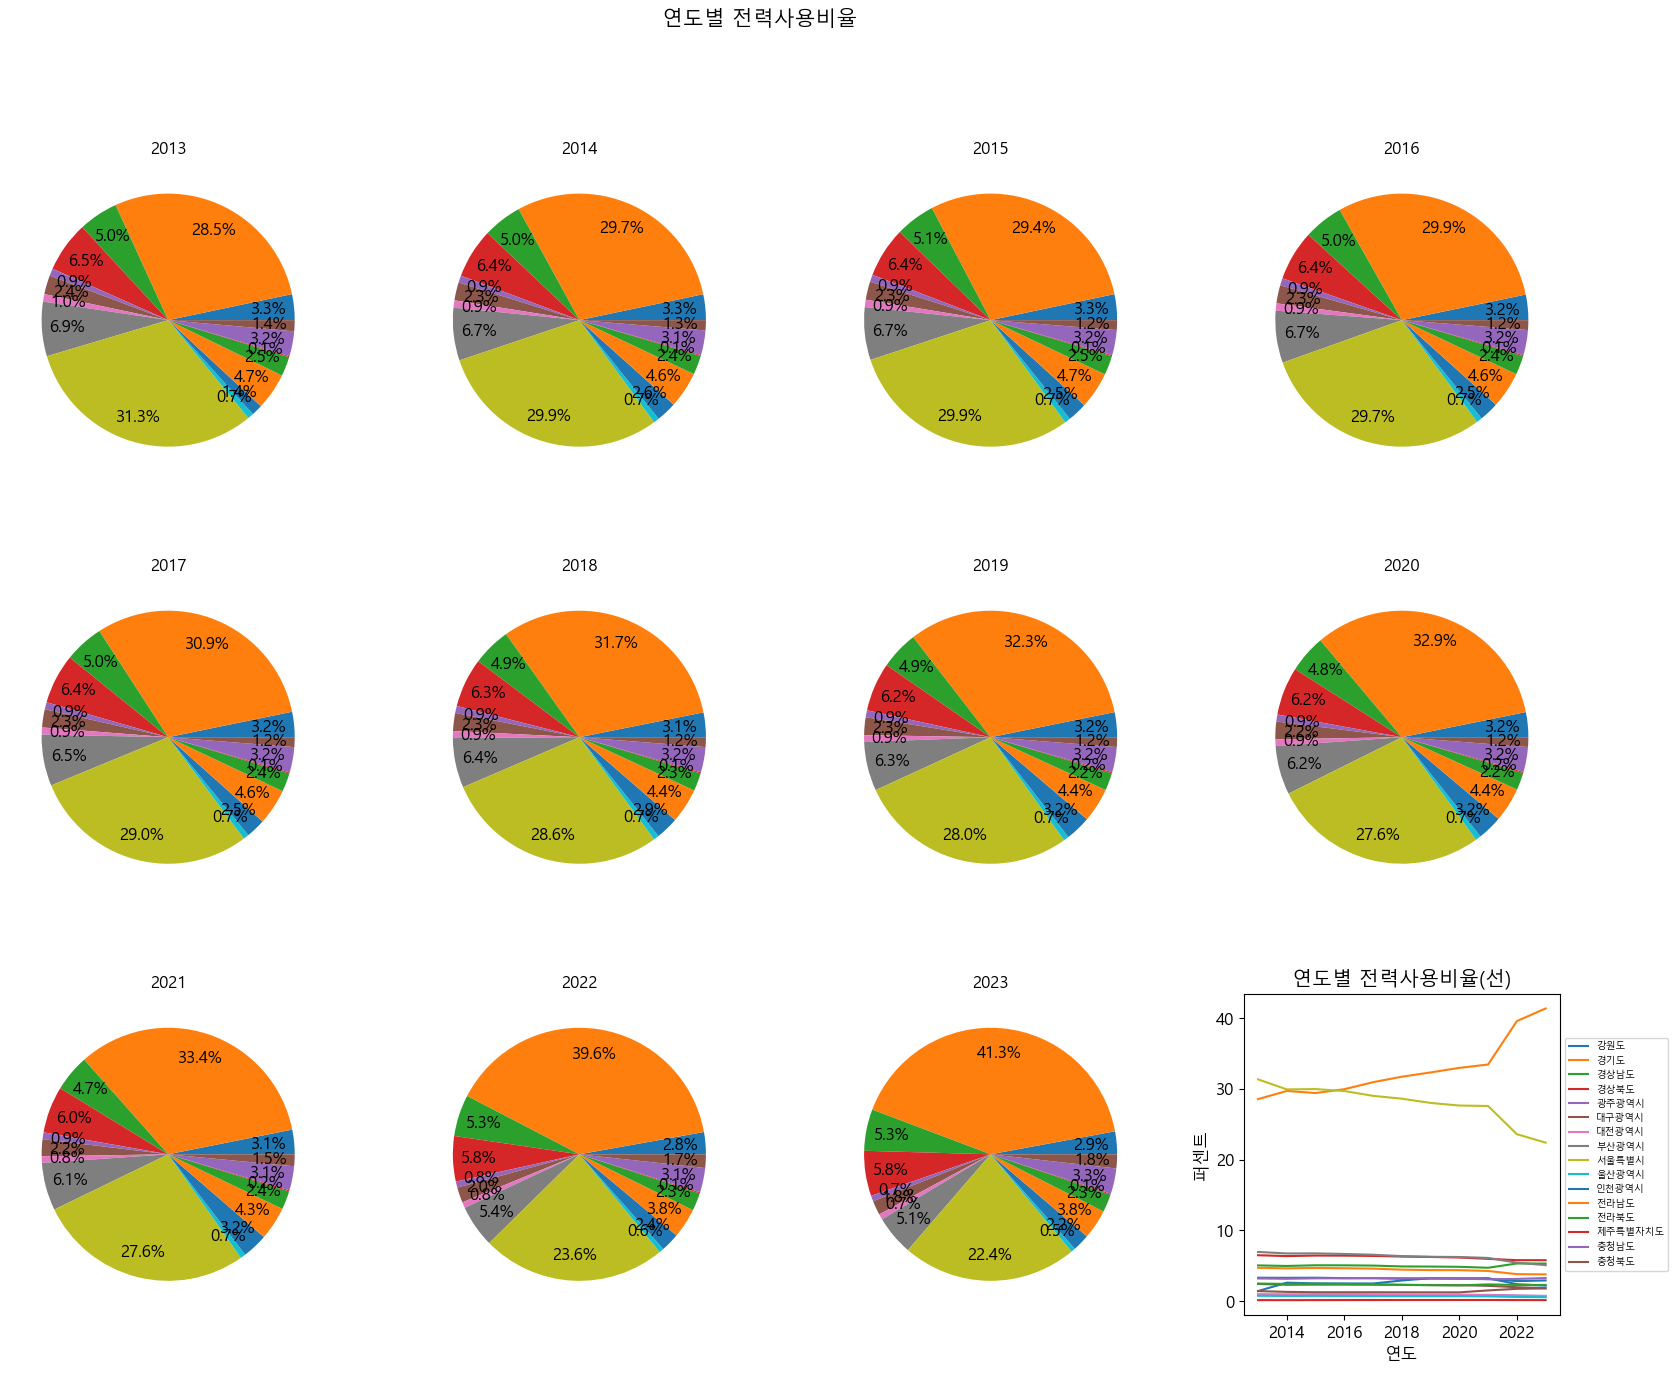

In [1456]:
# 2013년부터 2023년까지의 전력사용량을 비율로 표시 마지막은 표로 한눈에 볼 수 있게 표시함.
f, axes = plt.subplots(3, 4)

# 격자 크기 설정
f.set_size_inches((20, 15))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# figure 전체 제목
f.suptitle('연도별 전력사용비율', fontsize = 15)

axes[0,0].pie(elec_ratio[elec_ratio['year']==2013]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[0,0].set_title('2013', fontsize = 12)

axes[0,1].pie(elec_ratio[elec_ratio['year']==2014]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[0,1].set_title('2014', fontsize = 12)

axes[0,2].pie(elec_ratio[elec_ratio['year']==2015]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[0,2].set_title('2015', fontsize = 12)

axes[0,3].pie(elec_ratio[elec_ratio['year']==2016]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[0,3].set_title('2016', fontsize = 12)

axes[1,0].pie(elec_ratio[elec_ratio['year']==2017]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[1,0].set_title('2017', fontsize = 12)

axes[1,1].pie(elec_ratio[elec_ratio['year']==2018]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[1,1].set_title('2018', fontsize = 12)

axes[1,2].pie(elec_ratio[elec_ratio['year']==2019]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[1,2].set_title('2019', fontsize = 12)

axes[1,3].pie(elec_ratio[elec_ratio['year']==2020]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[1,3].set_title('2020', fontsize = 12)

axes[2,0].pie(elec_ratio[elec_ratio['year']==2021]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[2, 0].set_title('2021', fontsize = 12)

axes[2,1].pie(elec_ratio[elec_ratio['year']==2022]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[2,1].set_title('2022', fontsize = 12)

axes[2,2].pie(elec_ratio[elec_ratio['year']==2023]['ratio'],
        autopct='%.1f%%', 
        pctdistance=0.8)
axes[2,2].set_title('2023', fontsize = 12)

axes[2,3].plot(elec_ratio_1)
axes[2,3].legend(elec_ratio[elec_ratio['year']==2013]['metro'],
           loc='center left',
           fontsize=7,bbox_to_anchor=(1,0.5))
axes[2,3].set_title('연도별 전력사용비율(선)')
axes[2,3].set_xlabel('연도')
axes[2,3].set_ylabel('퍼센트')

plt.show()